In [1]:
import numpy as np

from baseline import *
from evaluation import *
from thompson_sampling import *

In [2]:
contents_ctr1 = [[0.1, 0.3, 0.3,0.1],
                [0.55, 0.9, 0.7],
                [0.8, 0.3, 0.4, 0.1]]

contents_ctr2 =[[0.9, 0.3, 0.8,0.1,],
                [0.55, 0.2, 0.7],
                [0.8, 0.3, 0.4, 0.9]]

contents_ctr3 =[[0.3, 0.2, 0.5,0.1,],
                [0.3, 0.2, 0.5],
                [0.8, 0.7, 0.8, 0.9]]

contents_ctr4 =[[0.9, 0.7, 0.8,0.1,],
                [0.55, 0.2, 0.5],
                [0.4, 0.3, 0.4, 0.3]]

contents_ctr5 =[[0.4, 0.5, 0.55, 0.3,0.1,0.2],
                [0.9, 0.2, 0.5,0.3,0.7,0.5,0.2,0.1],
                [0.1,0.1,0.6]]

contents_ctr6 = [[0.1, 0.3, 0.3,0.1],
                [0.7, 0.9, 0.65],
                [0.8, 0.3, 0.4, 0.1],
                [0.1, 0.3, 0.3,0.1],
                [0.1, 0.3, 0.3,0.1],
                [0.5, 0.3, 0.4, 0.1],
                [0.7, 0.9, 0.7],
                [0.5, 0.3, 0.4, 0.1]]

collection = [contents_ctr1, contents_ctr2, contents_ctr3,
              contents_ctr4, contents_ctr5, contents_ctr6]

  0%|          | 0/10 [00:00<?, ?it/s]/Users/haeyu/Documents/repository/Thompson-Sampling/base.py:129: RuntimeWarning: invalid value encountered in true_divide
  mean = self.alpha / (self.alpha + self.beta)
100%|██████████| 10/10 [01:11<00:00,  7.20s/it]


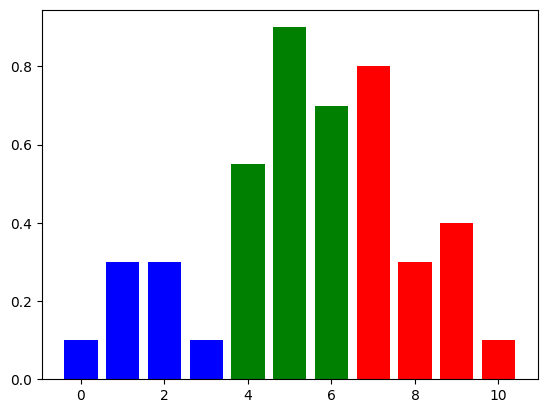

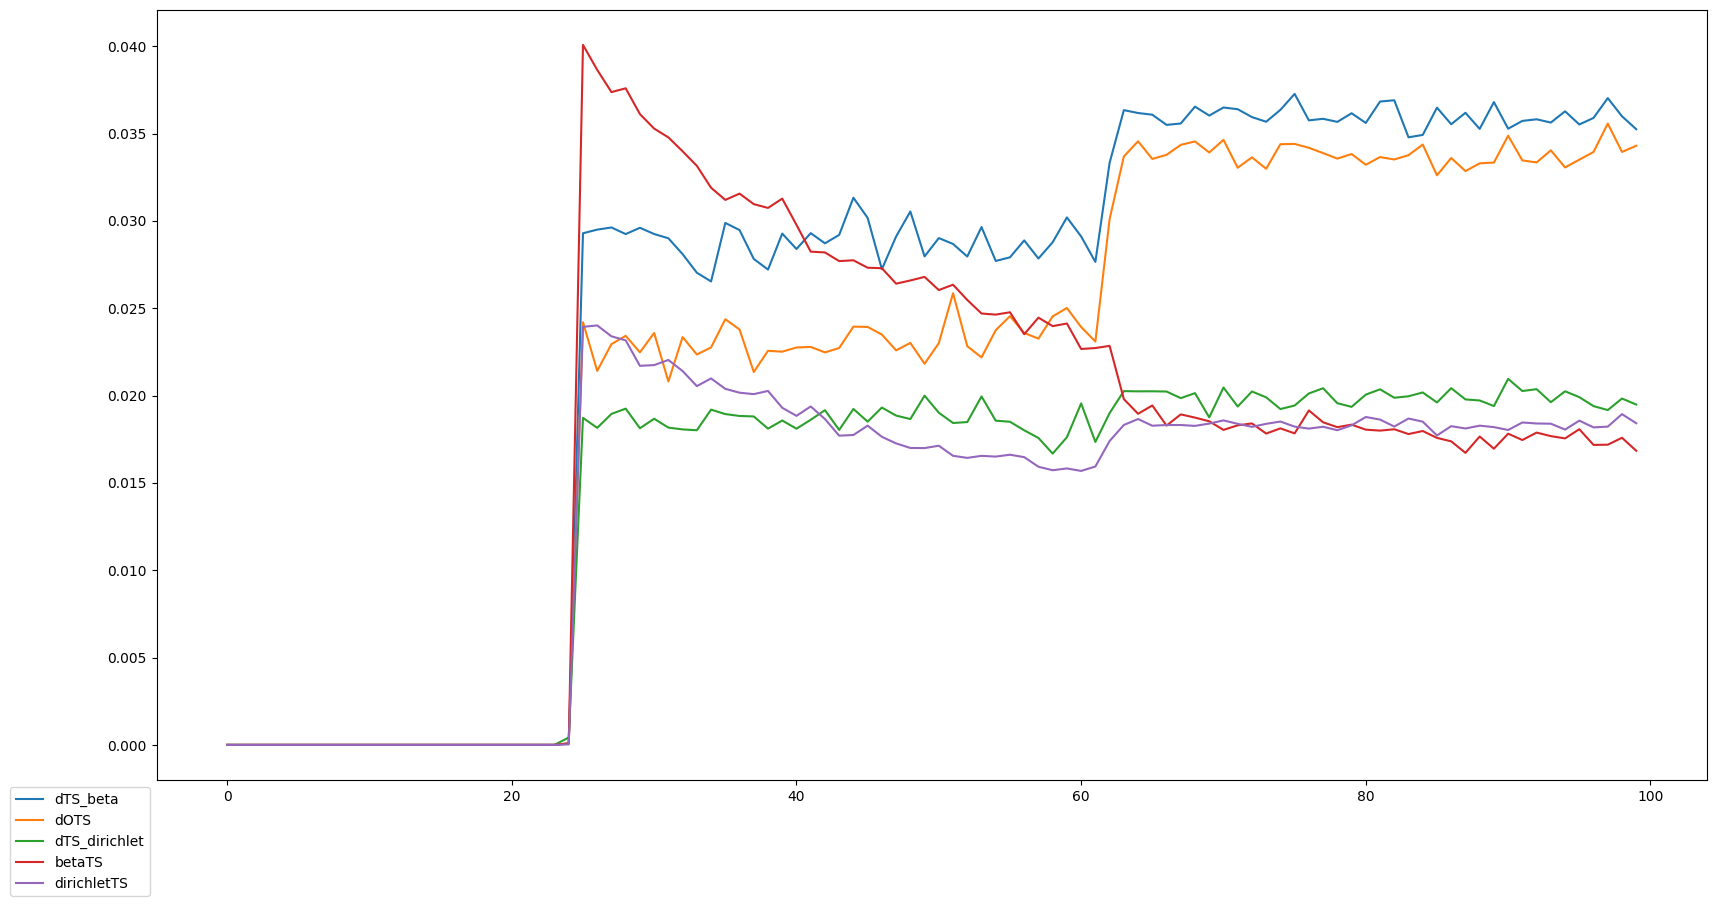

  0%|          | 0/10 [00:00<?, ?it/s]/Users/haeyu/Documents/repository/Thompson-Sampling/base.py:129: RuntimeWarning: invalid value encountered in true_divide
  mean = self.alpha / (self.alpha + self.beta)
100%|██████████| 10/10 [01:13<00:00,  7.31s/it]


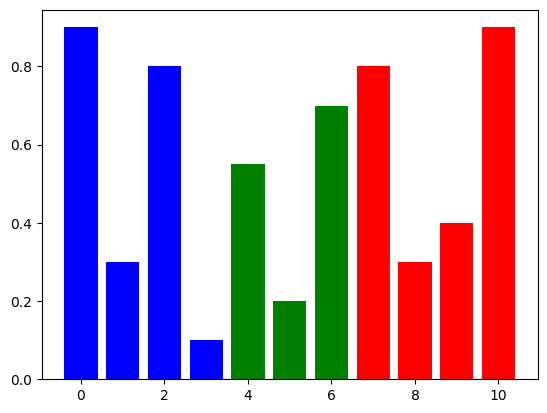

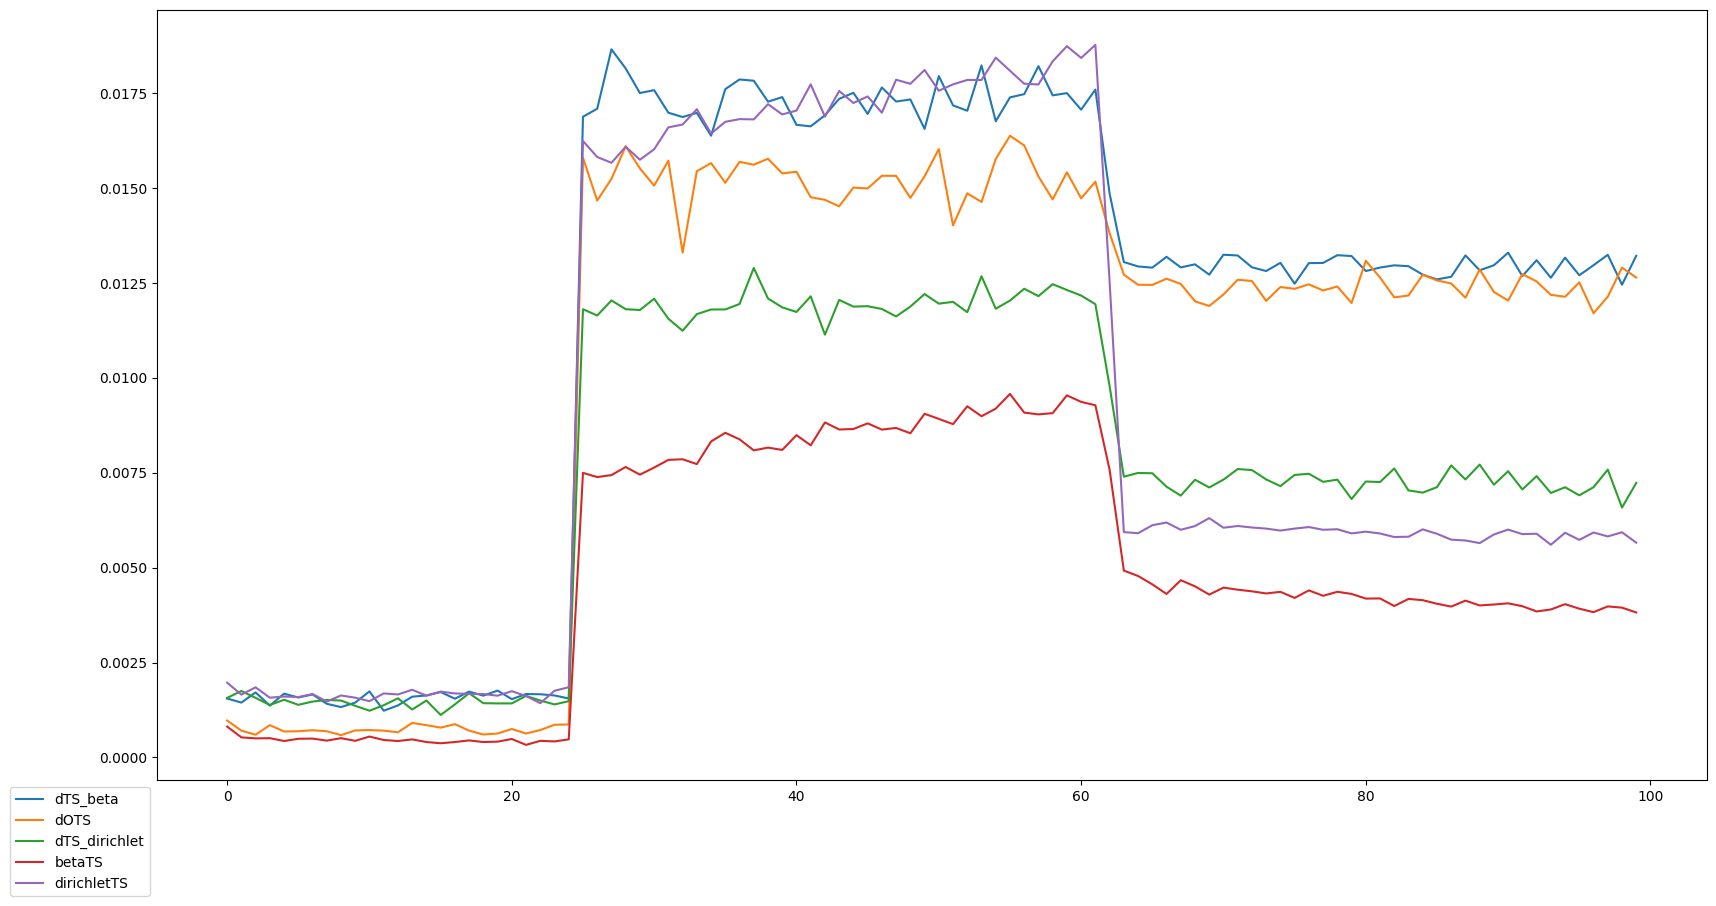

  0%|          | 0/10 [00:00<?, ?it/s]/Users/haeyu/Documents/repository/Thompson-Sampling/base.py:129: RuntimeWarning: invalid value encountered in true_divide
  mean = self.alpha / (self.alpha + self.beta)
100%|██████████| 10/10 [01:12<00:00,  7.21s/it]


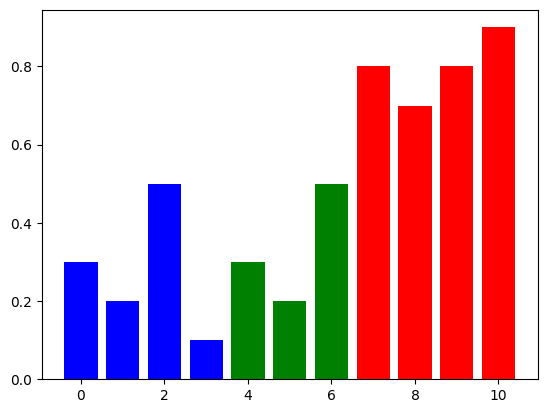

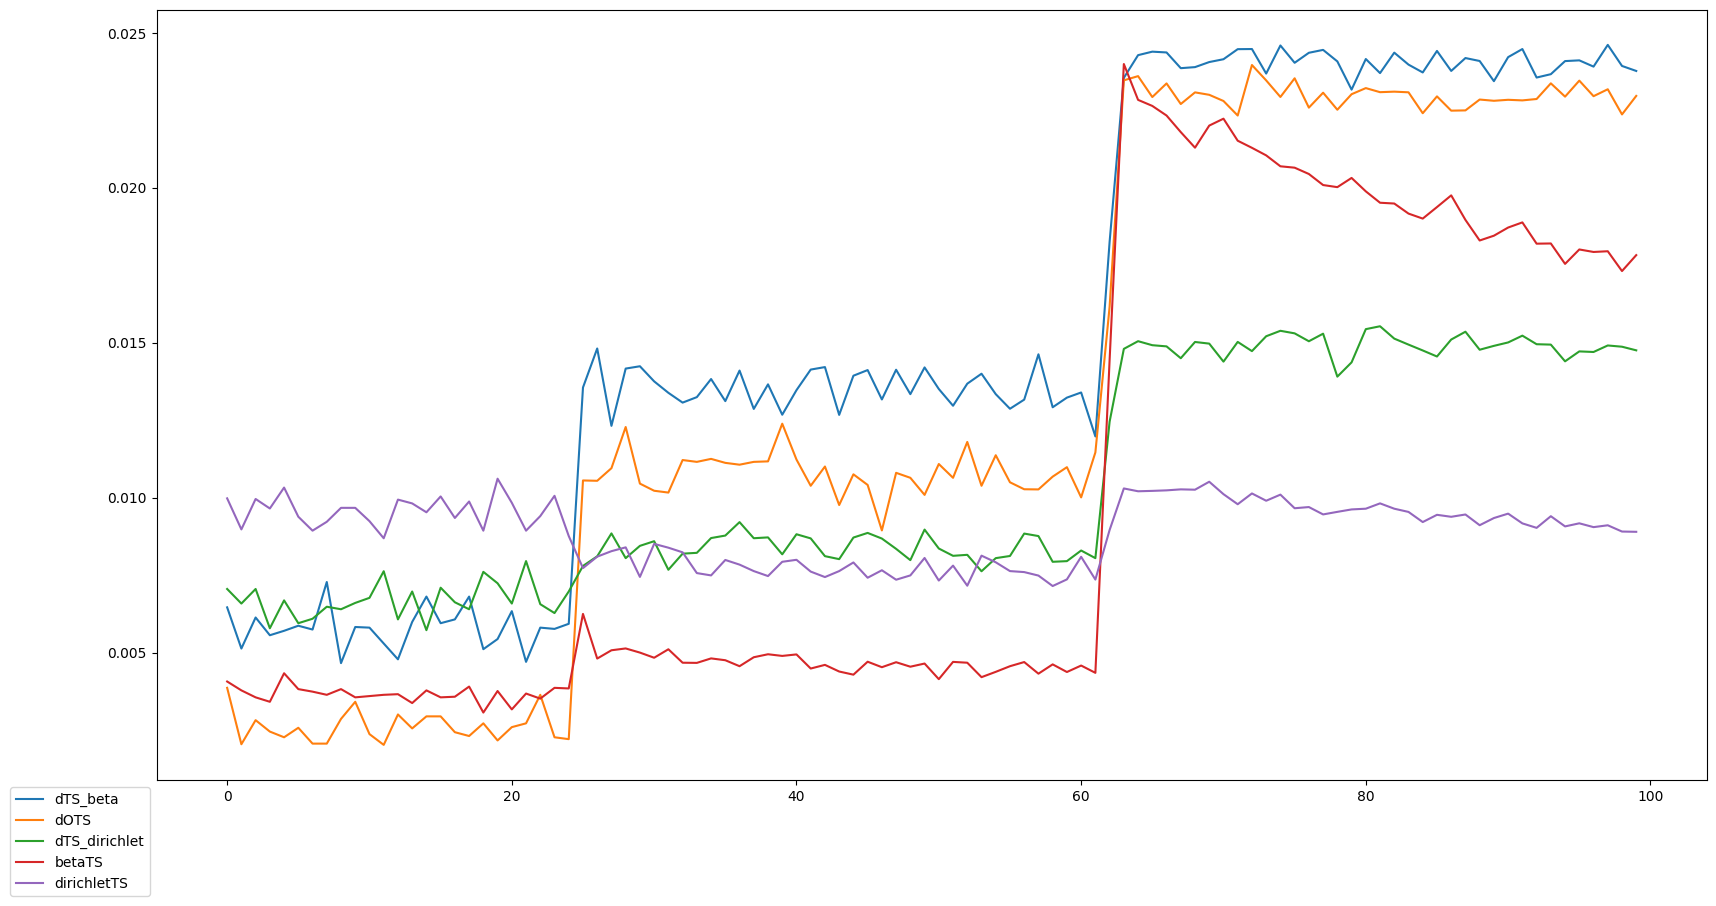

  0%|          | 0/10 [00:00<?, ?it/s]/Users/haeyu/Documents/repository/Thompson-Sampling/base.py:129: RuntimeWarning: invalid value encountered in true_divide
  mean = self.alpha / (self.alpha + self.beta)
100%|██████████| 10/10 [01:09<00:00,  6.98s/it]


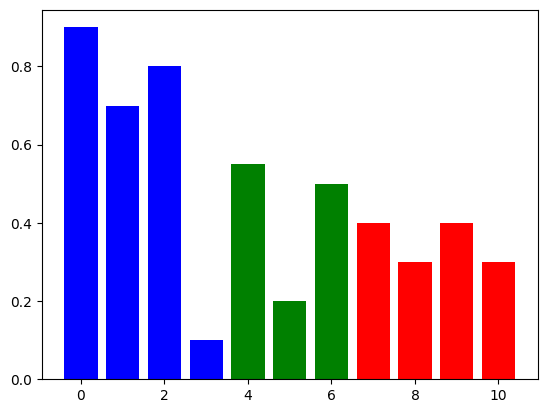

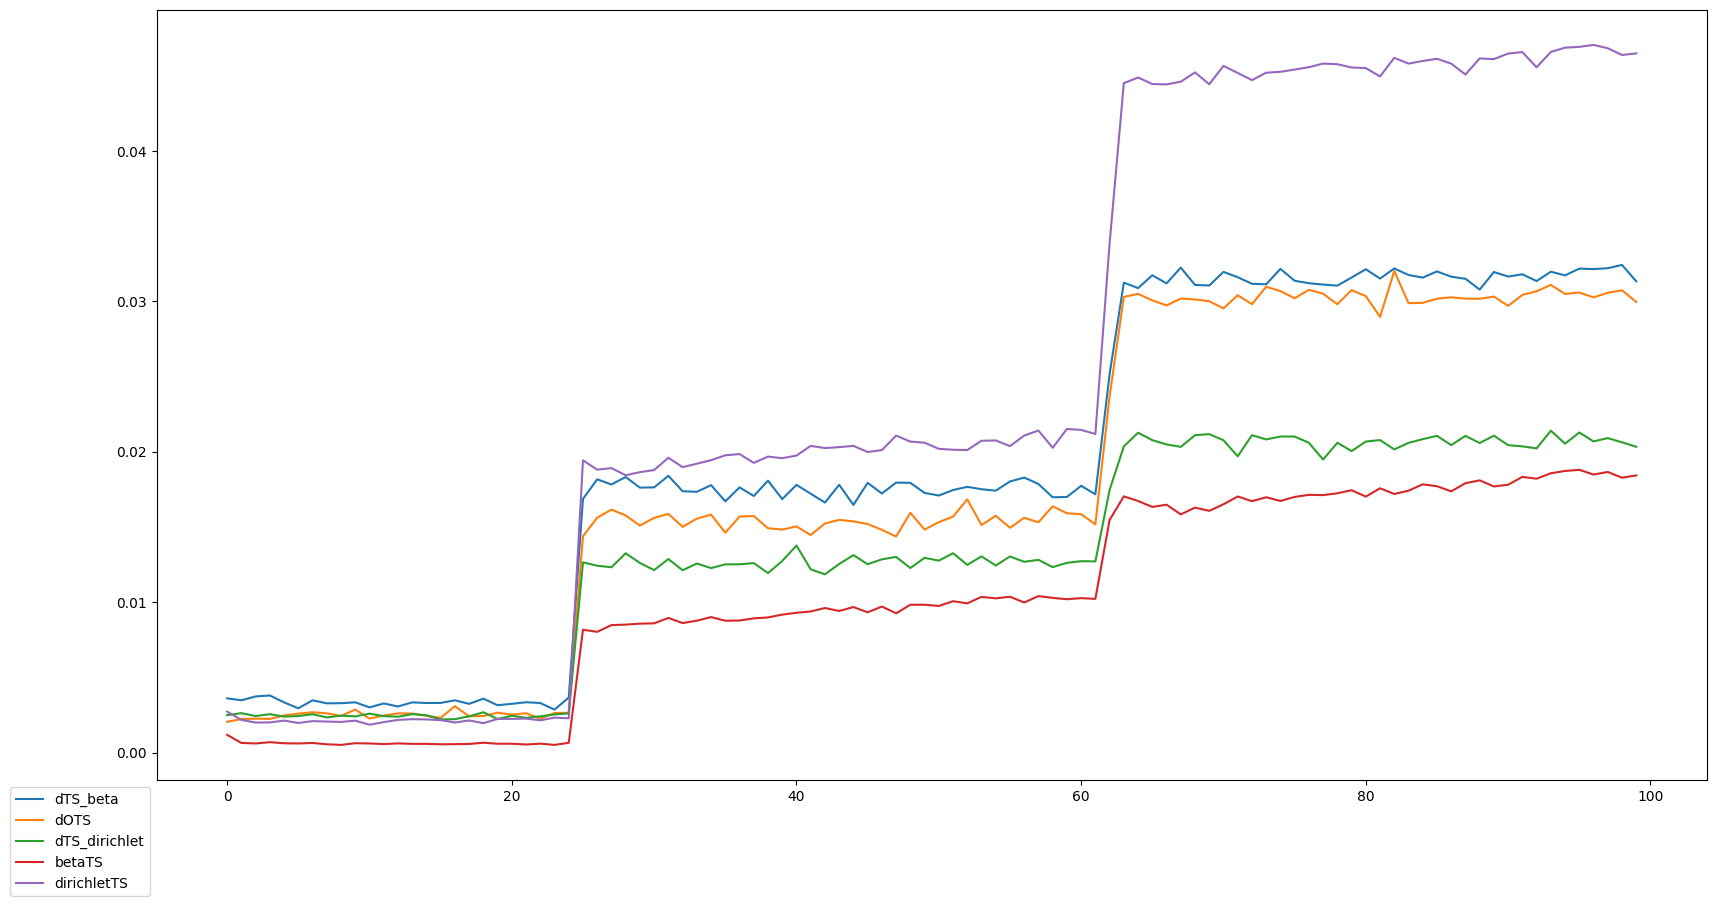

  0%|          | 0/10 [00:00<?, ?it/s]/Users/haeyu/Documents/repository/Thompson-Sampling/base.py:129: RuntimeWarning: invalid value encountered in true_divide
  mean = self.alpha / (self.alpha + self.beta)
100%|██████████| 10/10 [01:13<00:00,  7.33s/it]


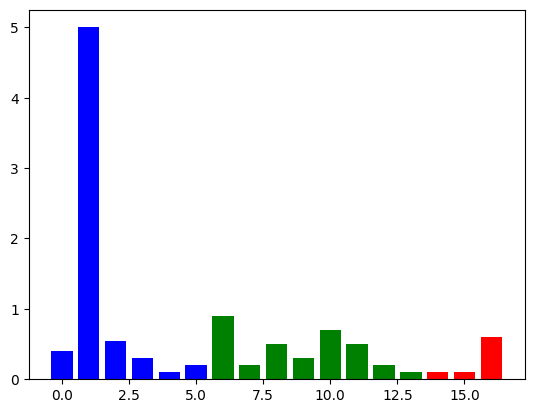

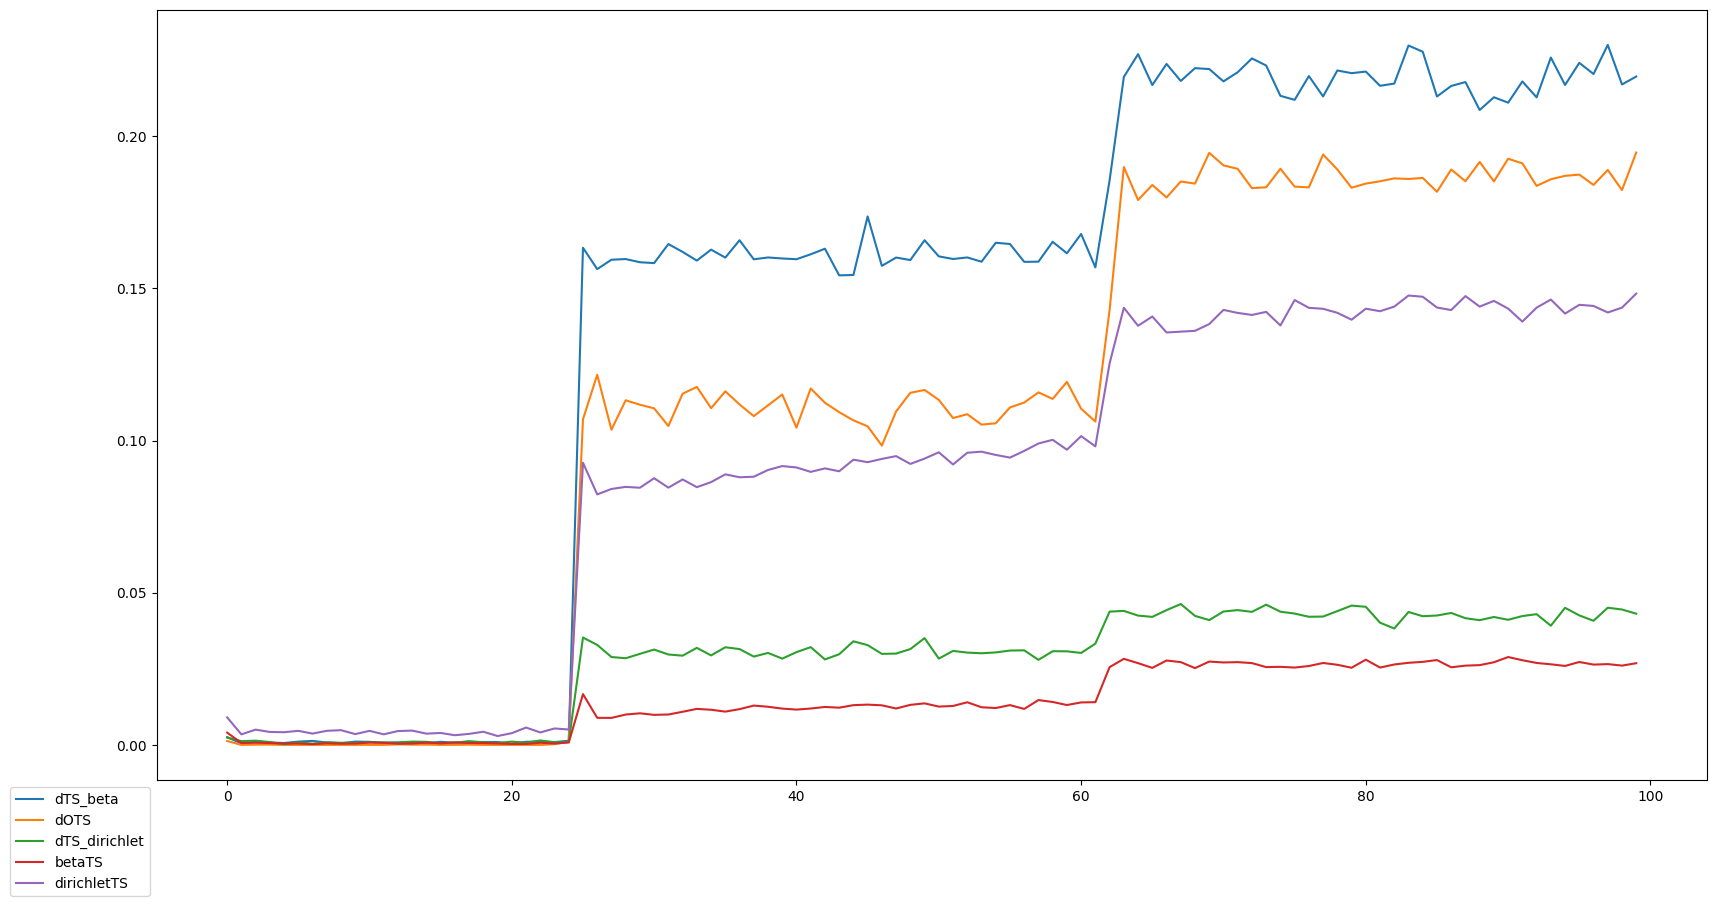

  0%|          | 0/10 [00:00<?, ?it/s]/Users/haeyu/Documents/repository/Thompson-Sampling/base.py:129: RuntimeWarning: invalid value encountered in true_divide
  mean = self.alpha / (self.alpha + self.beta)
100%|██████████| 10/10 [01:31<00:00,  9.14s/it]


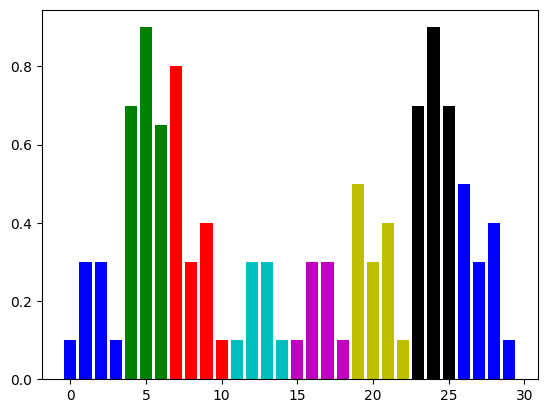

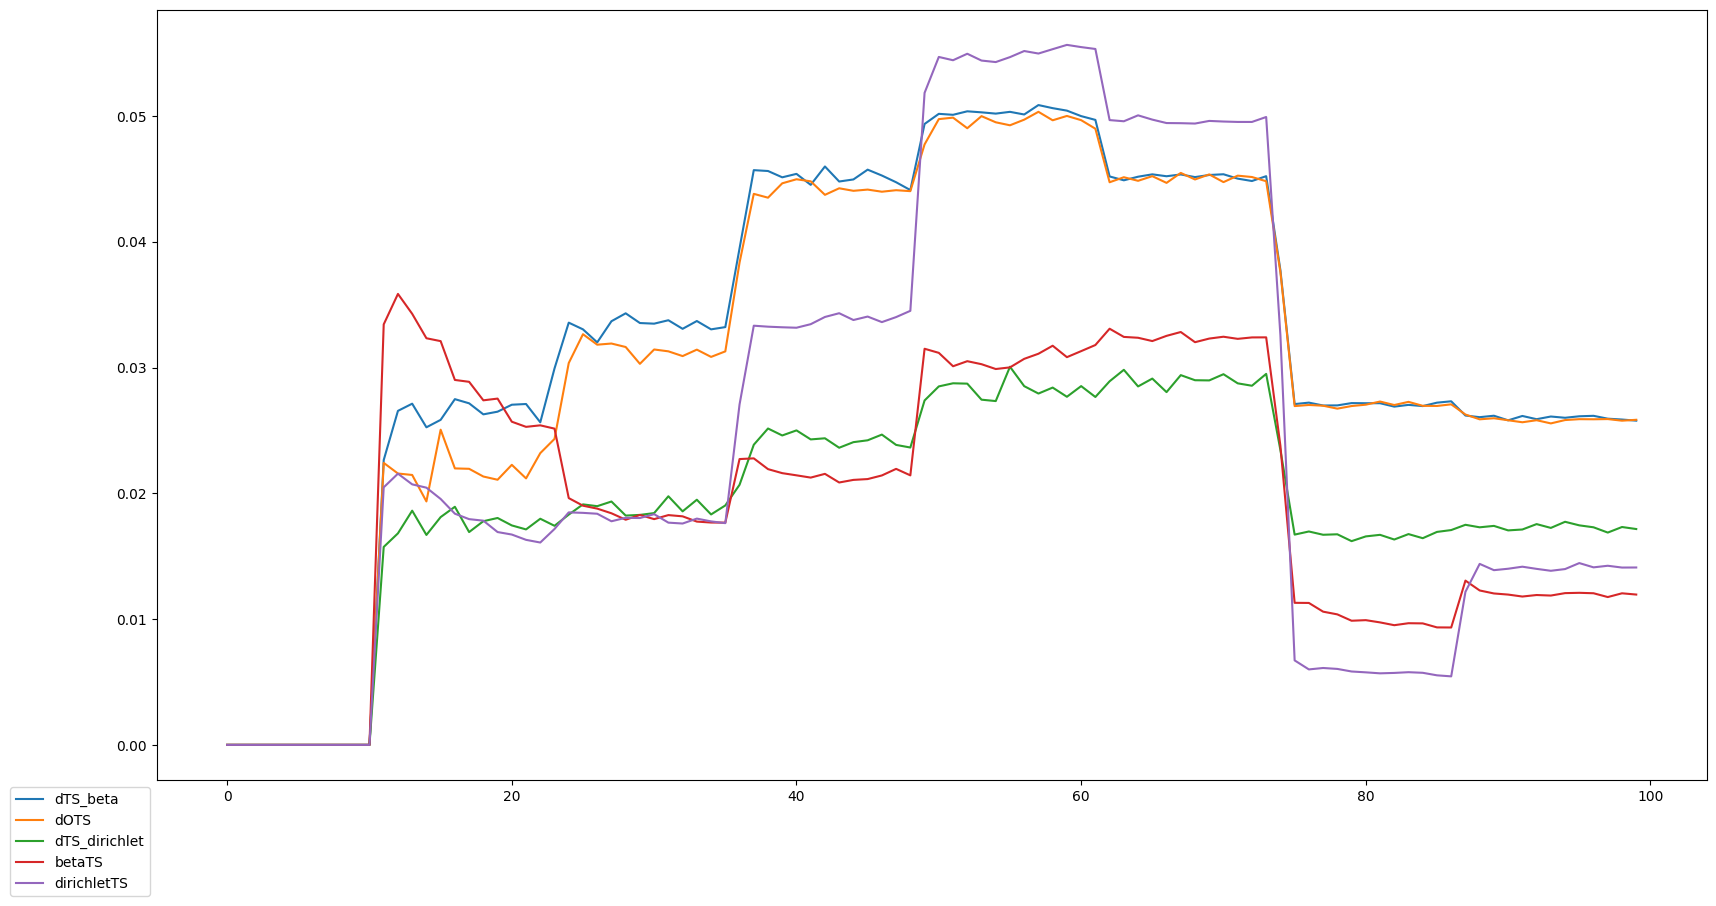

In [3]:
# 5번째 plot은 무시,,

for i, contents_ctr in enumerate(collection):
        # DiscounedTS(beta prior / dirichlet prior) , Discounted Optimistic TS
        dts_beta = evaluate(DiscountedThompsonSampling,
                        contents_ctr,
                        experiments = 10,
                        cluster_decay_size = None,
                        iterations = 100000,
                        topk = 3)

        dots = evaluate(DiscountedOptimisticThompsonSampling,
                        contents_ctr,
                        experiments = 10,
                        cluster_decay_size = None,
                        iterations = 100000,
                        topk = 3)

        dts_dirichlet = evaluate(DirichletDiscountedTS,
                        contents_ctr,
                        experiments = 10,
                        cluster_decay_size = None,
                        iterations = 100000,
                        topk = 3)

        # cluster decay
        dirichlet_ts = evaluate(DirichletThompsonSampling,
                        contents_ctr,
                        experiments = 10,
                        cluster_decay_size = np.exp(1),
                        iterations = 100000,
                        topk = 3)

        beta_ts = evaluate(BetaThompsonSampling,
                        contents_ctr,
                        experiments = 10,
                        cluster_decay_size = np.exp(1),
                        iterations = 100000,
                        topk = 3)

        barplot(contents_ctr)
        draw_regret(
                {
                        'dTS_beta' : dts_beta,
                        'dOTS' : dots,
                        'dTS_dirichlet' : dts_dirichlet,

                        'betaTS' : beta_ts,
                        'dirichletTS' : dirichlet_ts
                },
                n_groups = 100,
                save_to = f'./fig/regret-{i}.png')

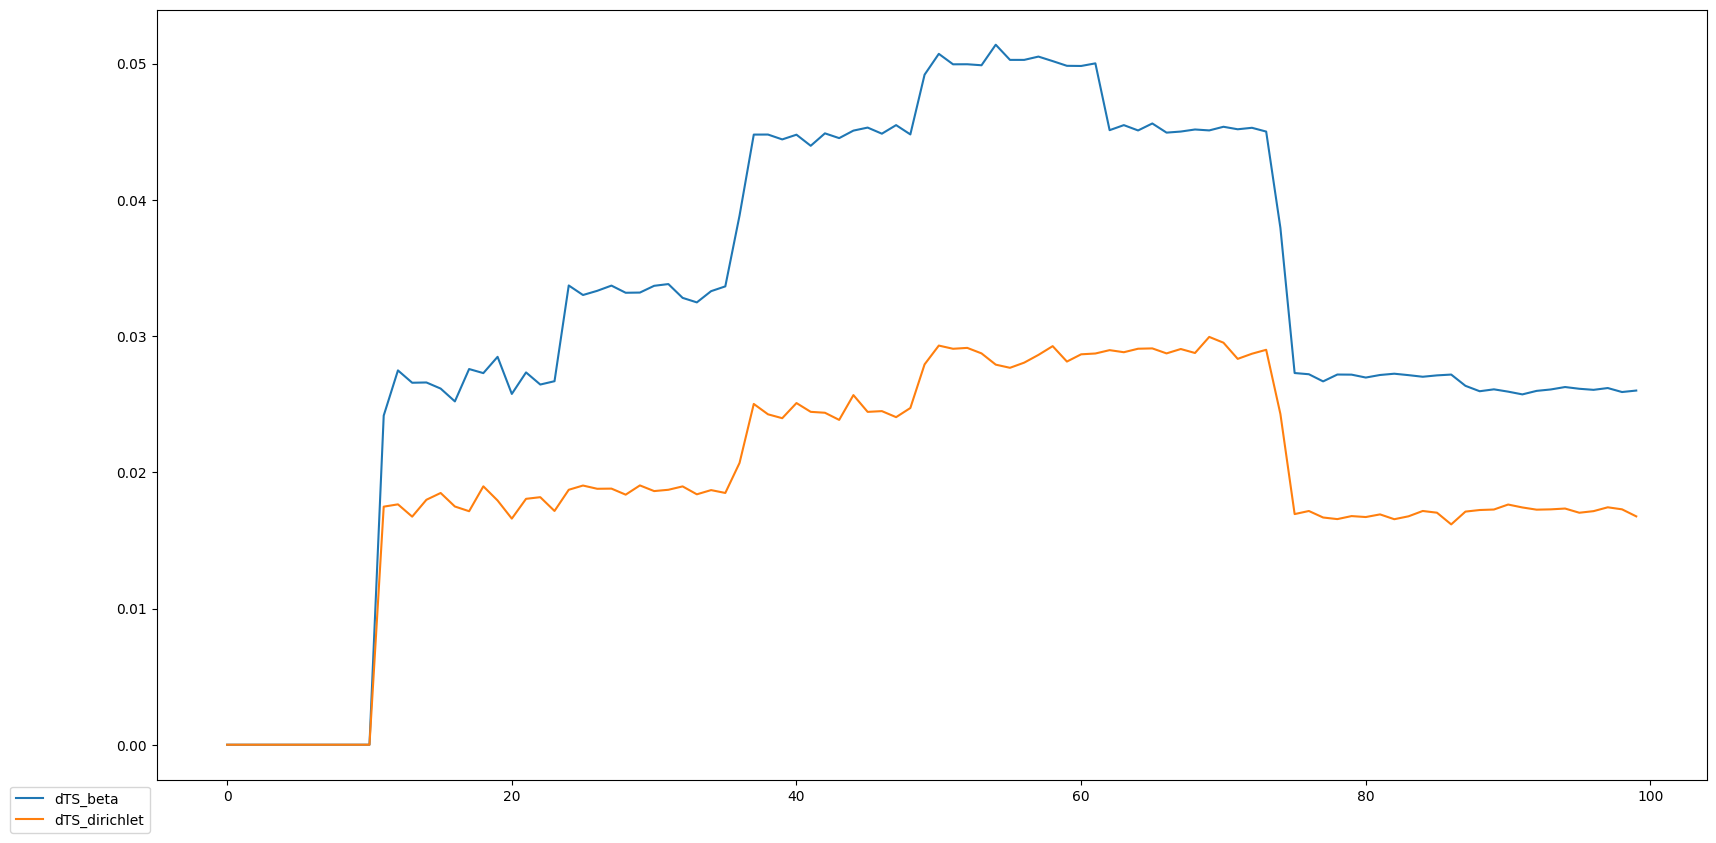

In [4]:
draw_regret(
        {
                'dTS_beta' : dts_beta,
                'dTS_dirichlet' : dts_dirichlet,
        },
        n_groups = 100)